# ggcorrplot: Visualization of a correlation matrix using plotnine

In [1]:
# Load packages
import statsmodels.api as sm
from plydata import *
import pandas as pd
from scientisttools.ggcorrplot import *
import plotnine as pn

In [2]:
# Load mtcars dataset
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
mtcars = pd.DataFrame(mtcars)
mtcars >> head(6)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1


In [3]:
corr = mtcars.corr()
corr >> head(6)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606


In [4]:
# Compute a matrix of correlation p - values
p_mat = cor_pmat(mtcars)
p_mat >> head(6)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,0.000000e+00,6.112687e-10,9.380327e-10,1.787835e-07,0.000018,1.293959e-10,0.017082,3.415937e-05,0.000285,0.005401,1.084446e-03
cyl,6.112687e-10,0.000000e+00,1.802838e-12,3.477861e-09,0.000008,1.217567e-07,0.000366,1.843018e-08,0.002151,0.004173,1.942340e-03
disp,9.380327e-10,1.802838e-12,0.000000e+00,7.142679e-08,0.000005,1.222320e-11,0.013144,5.235012e-06,0.000366,0.000964,2.526789e-02
hp,1.787835e-07,3.477861e-09,7.142679e-08,0.000000e+00,0.009989,4.145827e-05,0.000006,2.940896e-06,0.179831,0.493012,7.827810e-07
drat,1.776240e-05,8.244636e-06,5.282022e-06,9.988772e-03,0.000000,4.784260e-06,0.619583,1.167553e-02,0.000005,0.000008,6.211834e-01
wt,1.293959e-10,1.217567e-07,1.222320e-11,4.145827e-05,0.000005,0.000000e+00,0.338868,9.798492e-04,0.000011,0.000459,1.463861e-02


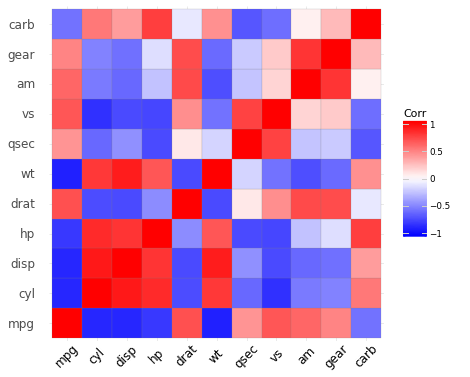

<ggplot: (195142063026)>

In [5]:
# Visualize the correlation matrix

# method = "square" (default)
ggcorrplot(mtcars)

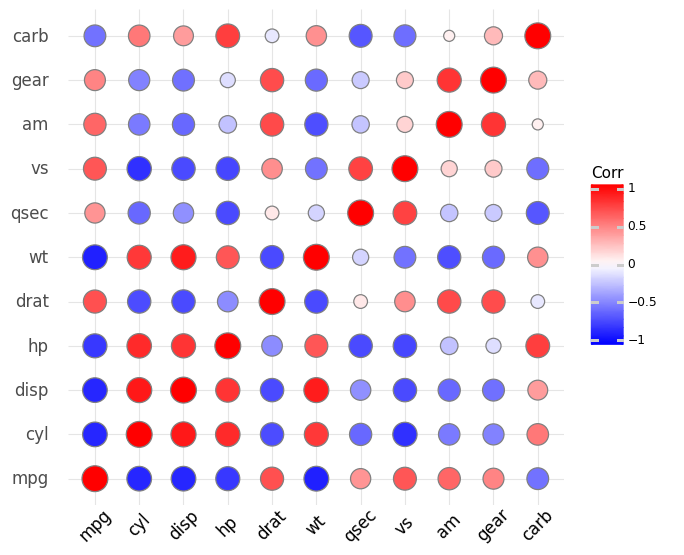

<ggplot: (195141924717)>

In [6]:
# method = "circle"
ggcorrplot(mtcars, method = "circle")

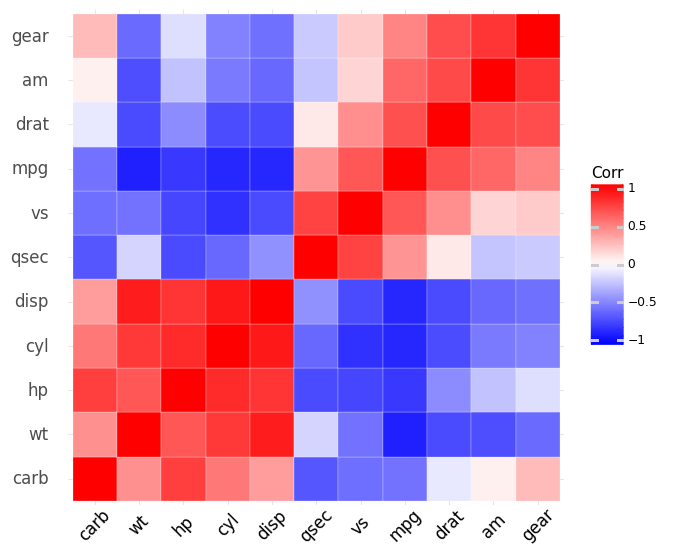

<ggplot: (195141970758)>

In [7]:
# Reordering the correlation matrix
# --------------------------------
# using hierarchical clustering
ggcorrplot(mtcars, hc_order = True, outline_color = "white")

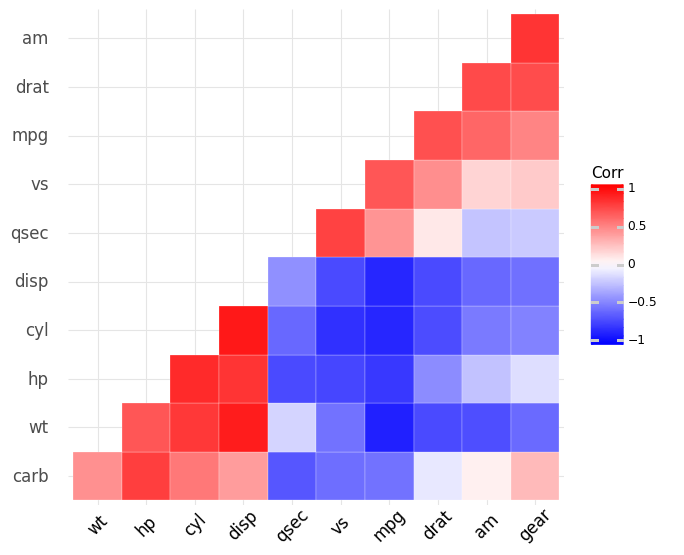

<ggplot: (195141970695)>

In [8]:
# Types of correlogram layout
# --------------------------------
# Get the lower triangle
ggcorrplot(mtcars,hc_order = True, type = "lower",outline_color = "white")

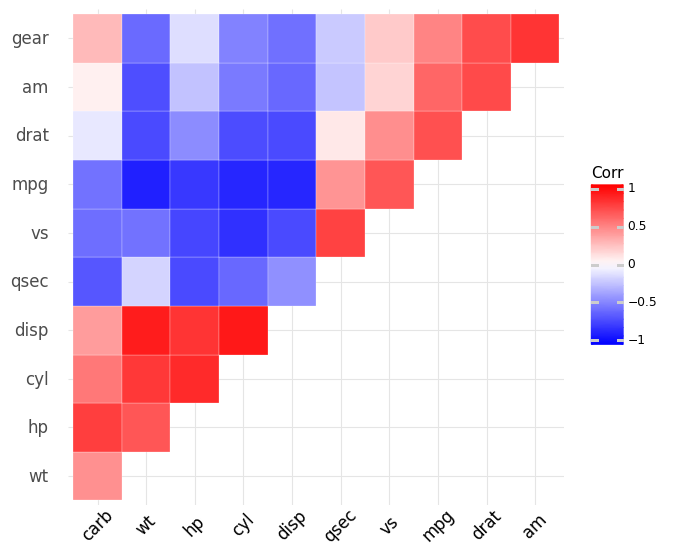

<ggplot: (195144473604)>

In [9]:
# Get the upeper triangle
ggcorrplot(mtcars, hc_order = True,type = "upper",outline_color = "white")

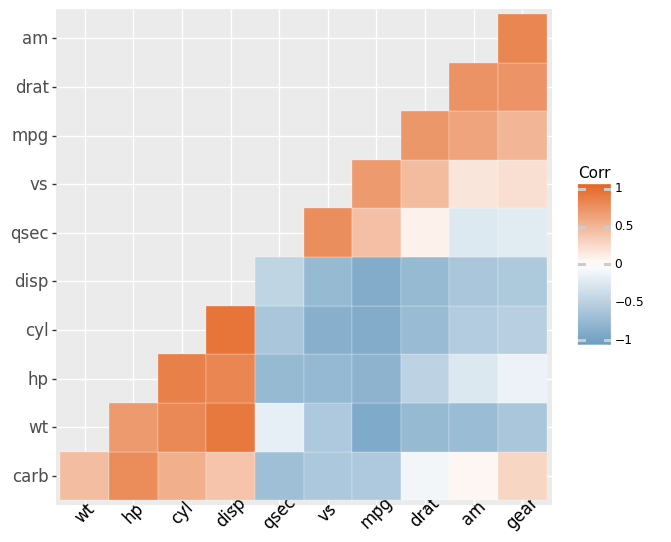

<ggplot: (195144598946)>

In [10]:
# Change colors and theme
# --------------------------------
# Argument colors
ggcorrplot(mtcars,hc_order = True,type = "lower",outline_color = "white",
            ggtheme = pn.theme_gray(),
            colors = ("#6D9EC1", "white", "#E46726"))

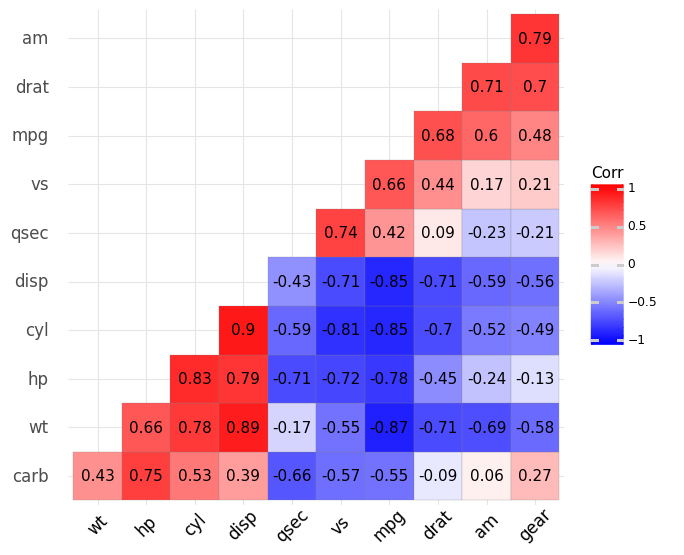

<ggplot: (195144598865)>

In [11]:
# Add correlation coefficients
# --------------------------------
# argument lab = True
ggcorrplot(mtcars,hc_order = True,type = "lower",lab = True)

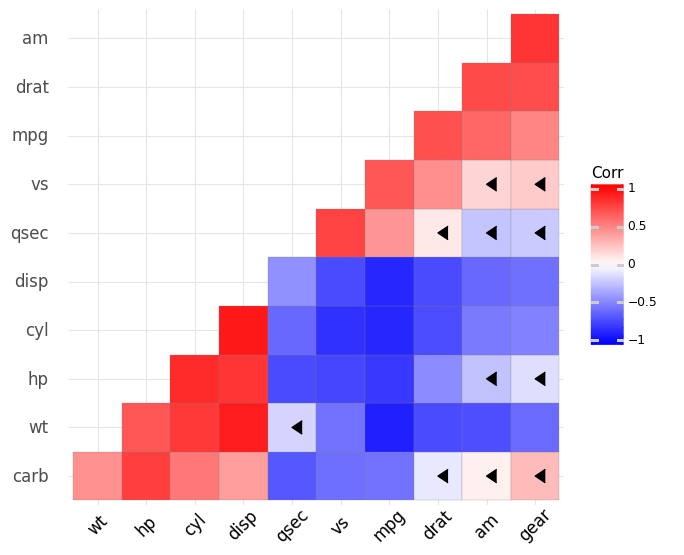

<ggplot: (195141936717)>

In [12]:
# Add correlation significance level
# --------------------------------
# Argument p.mat
# Barring the no significant coefficient
ggcorrplot(mtcars,hc_order = True, type = "lower", p_mat = p_mat)

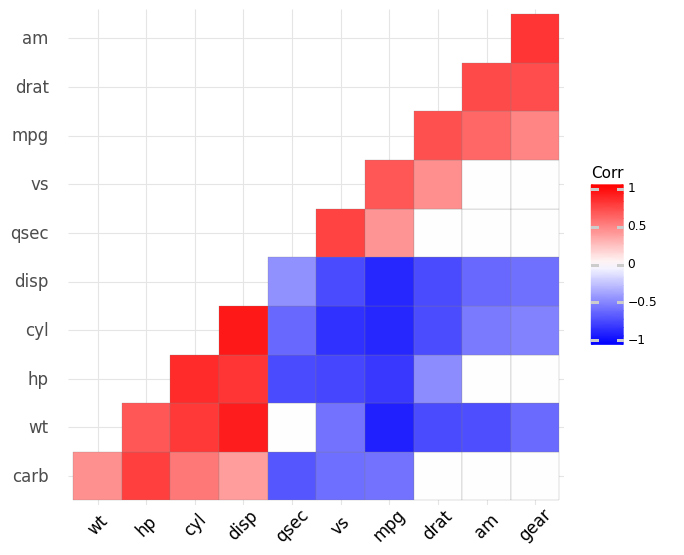

<ggplot: (195145056764)>

In [13]:
# Leave blank on no significant coefficient
ggcorrplot(mtcars, p_mat = p_mat,hc_order = True,type = "lower", insig = "blank")